
=== Zadanie 1 ===
wylosowanie wartości cech dla 300 próbek, 3 klastry


Text(0, 0.5, 'X1')

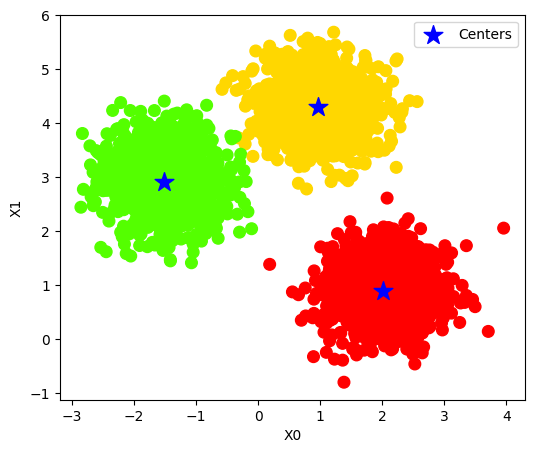

In [143]:

# == Importy ==
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans

#Algorytm k-means pozwala przyporządkować przykłady ze zbioru danych do centroidów. Innymi słowy, 
# algorytm grupuje przykłady względem ich podobieństwa. Liczba centroidów jest zazwyczaj zdefiniowana przez użytkownika.

def plot_clusters(X, labels, centers=None, title=""):
# X to dane wejściowe, labels to etykiety klastrów,
# centers to współrzędne centroidów (opcjonalnie)
    plt.figure(figsize=(6, 5))
    plt.scatter(X[:, 0], X[:, 1], c=labels, s=70, cmap=plt.cm.prism)
    if centers is not None:
        plt.scatter(centers[:, 0], centers[:, 1], marker='*', s=200,
                    c='black', label='Centers')
    plt.title(title)
    plt.legend()
    plt.xlabel("X0")
    plt.ylabel("X1")
    plt.show()




print("\n=== Zadanie 1 ===")
print("wylosowanie wartości cech dla 300 próbek, 3 klastry")
X, y = make_blobs(n_samples=3210, centers=3, n_features=2,
                  cluster_std=0.5, shuffle=True, random_state=0)
km = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300,
            tol=1e-4, random_state=42)
#przygotowanie algorytmu k-means, który dla każdego przykładu z X
# przyporządkuje etykietę klastra (0, 1 lub 2)
#licząc inercję, czyli sumę kwadratów odległości punktów od centroidów
# i zwróci etykiety klastra dla każdego przykładu


y_km = km.fit_predict(X)
#wywołanie metody fit_predict, która zwraca etykiety klastra dla każdego przykładu

plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], s=70, c=km.labels_, cmap=plt.cm.prism) 
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], marker='*', s=200,
            color='blue', label='Centers')
plt.legend(loc='best')
plt.xlabel('X0')
plt.ylabel('X1')



=== Zadanie 2 ===


C:\Users\kamil\AppData\Local\Temp\ipykernel_14376\1605304785.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


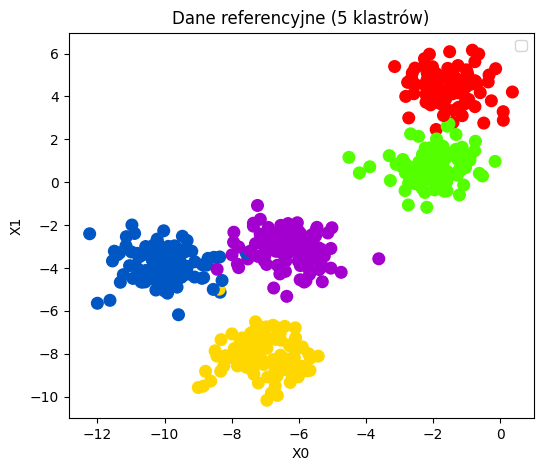

Inercja (k=5): 592.9652684602427


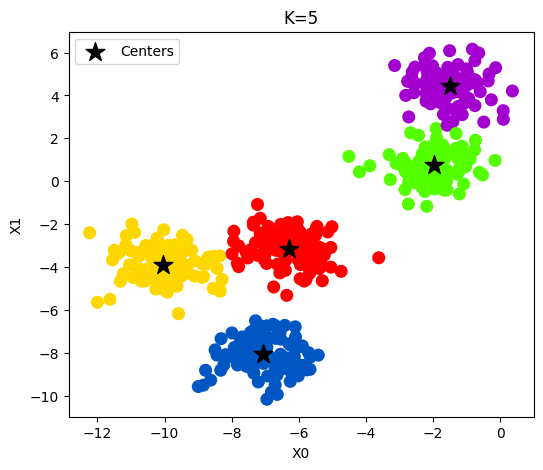

Inercja (k=3): 2016.6456434208162


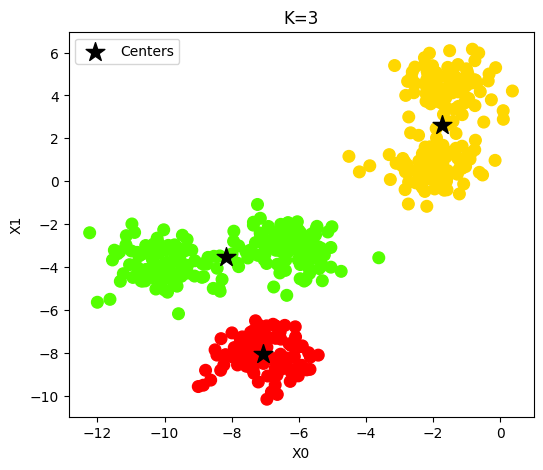

Inercja (k=7): 495.87210039308474


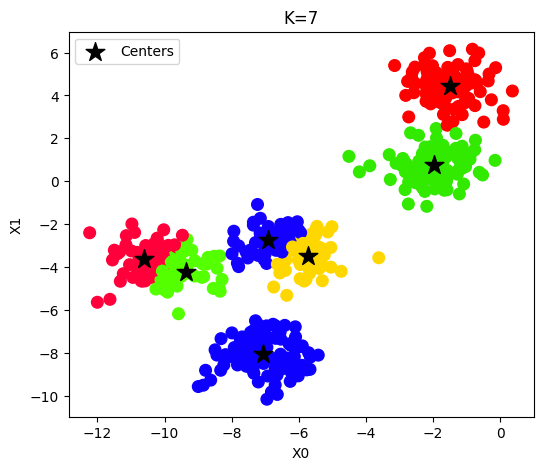

In [144]:

# =================================================
# Zadanie 2 – wpływ liczby klastrów i parametru std
# =================================================
print("\n=== Zadanie 2 ===")
X2, y2_true = make_blobs(n_samples=500, centers=5, n_features=2,
                         cluster_std=0.8, shuffle=True, random_state=1)
plot_clusters(X2, y2_true, title="Dane referencyjne (5 klastrów)")

# -- k=5 (prawidłowa liczba) --
km5 = KMeans(n_clusters=5, init='random', n_init=10, random_state=1)
labels5 = km5.fit_predict(X2)
print("Inercja (k=5):", km5.inertia_)
#incercja to suma kwadratów odległości punktów od centroidów
plot_clusters(X2, labels5, km5.cluster_centers_, "K=5")

# -- k=3 i k=7 (zła liczba klastrów) --
for k in (3, 7):
    kmk = KMeans(n_clusters=k, init='random', n_init=10, random_state=1)
    lab = kmk.fit_predict(X2)
    print(f"Inercja (k={k}):", kmk.inertia_)
    plot_clusters(X2, lab, kmk.cluster_centers_, f"K={k}")






=== Zadanie 3 - porównanie random vs k-means++ ===
blob:
  Inertia (random init)    = 1565.4
  Inertia (k-means++ init) = 1565.4


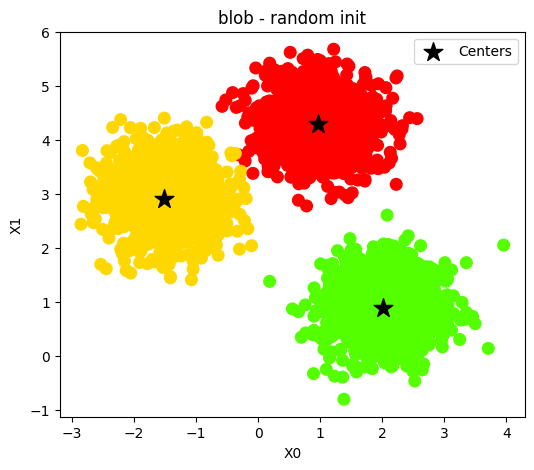

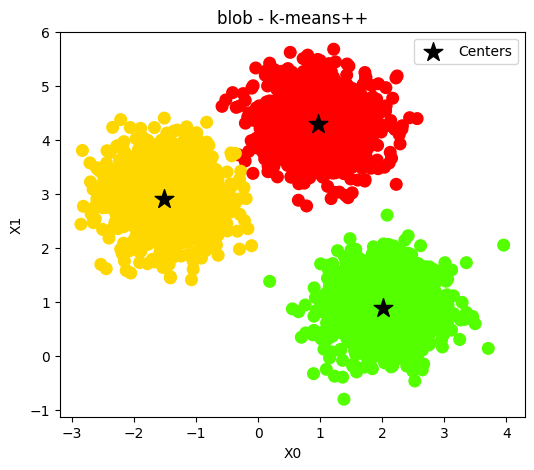

blob‑5:
  Inertia (random init)    = 593.0
  Inertia (k-means++ init) = 593.0


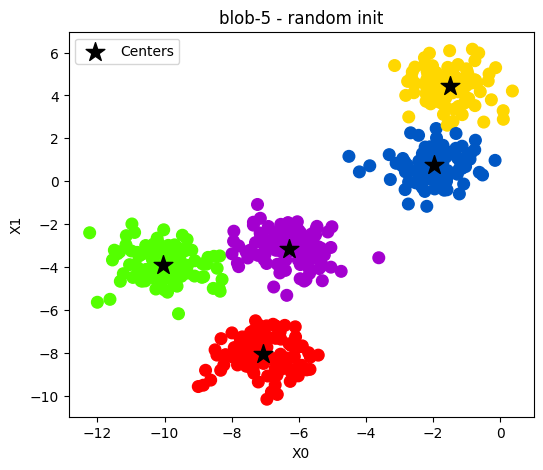

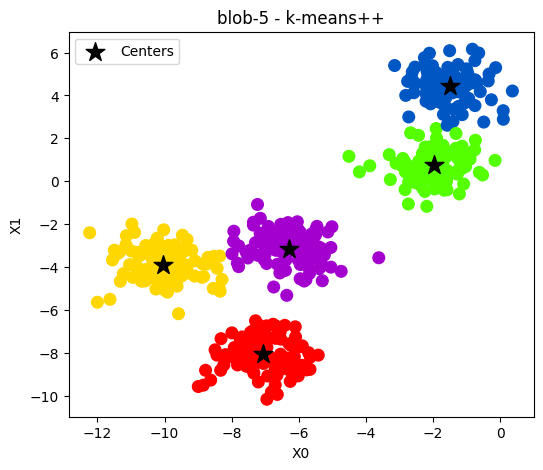

In [145]:

print("\n=== Zadanie 3 - porównanie random vs k-means++ ===")
#Algorytm K-Means++ pozwala na rozmieszczenie centroidów jak najdalej od siebie co zapewnia lepsze 
# (mniejsza wartość zniekształcenia) oraz spójniejsze wyniki niż klasyczna metoda KMeans.

for Xtest, name, k in [(X, "blob", 3), (X2, "blob‑5", 5)]:
    km_rand = KMeans(n_clusters=k, init='random', n_init=10, random_state=2,  max_iter=3)
    km_pp = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=2,  max_iter=3)
    #
    km_rand.fit(Xtest)
    km_pp.fit(Xtest)
    
    # Wyniki liczbowe
    print(f"{name}:")
    print(f"  Inertia (random init)    = {km_rand.inertia_:.1f}")
    print(f"  Inertia (k-means++ init) = {km_pp.inertia_:.1f}")
    
    # Wizualizacja przy pomocy Twojej funkcji
    plot_clusters(Xtest, km_rand.labels_, centers=km_rand.cluster_centers_, title=f"{name} - random init")
    plot_clusters(Xtest, km_pp.labels_, centers=km_pp.cluster_centers_, title=f"{name} - k-means++")



=== Zadanie 4 ===


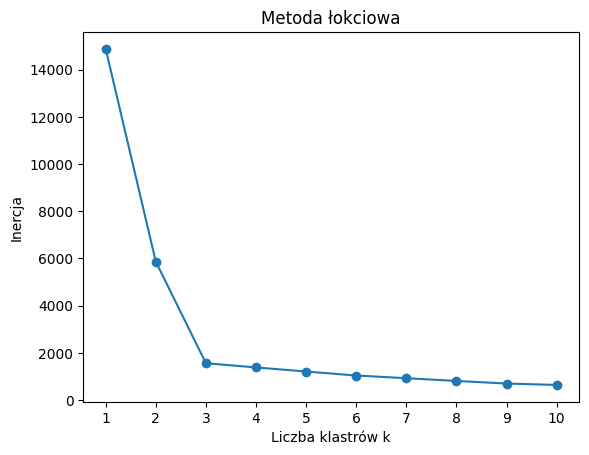

In [146]:
# Zadanie 4 – metoda łokciowa
# =================================================
def elbow_method(X, k_range=range(1, 11)):
    """Metoda łokciowa – zwraca listę inercji i rysuje wykres."""
    # X to dane wejściowe, k_range to zakres liczby klastrów
    # funkcja działa w ten sposób że dla każdego k z k_range
    # tworzy model KMeans, dopasowuje go do danych X i zapisuje inercję
    # czyli sumę kwadratów odległości punktów od centroidów
    # następnie rysuje wykres inercji w funkcji liczby klastrów k
    
    inertias = []
    for k in k_range:
        km = KMeans(n_clusters=k, init='k-means++', n_init=10,
                    random_state=0)
        km.fit(X)
        inertias.append(km.inertia_)
    plt.figure()
    plt.plot(list(k_range), inertias, marker='o')
    plt.xticks(list(k_range))
    plt.xlabel("Liczba klastrów k")
    plt.ylabel("Inercja")
    plt.title("Metoda łokciowa")
    plt.show()
    return inertias

print("\n=== Zadanie 4 ===")
_ = elbow_method(X, range(1, 11))



=== Zadanie 5 ===
         f1        f2
0  2.021001  0.490179
1  1.678201 -0.201987
2 -0.282245  0.858785
3 -0.021440  0.176281
4  0.504842 -0.391043


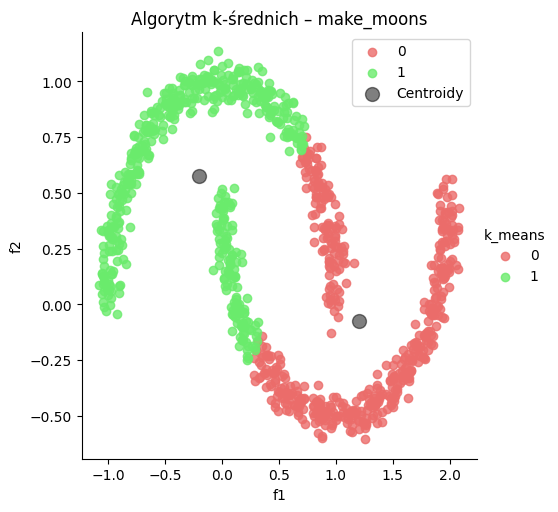

In [147]:

# =================================================
# Zadanie 5 – klasteryzacja make_moons
# =================================================
print("\n=== Zadanie 5 ===")
x, y = make_moons(1000, noise=0.05, random_state=0)
X_moon = pd.DataFrame(x, columns=['f1', 'f2'])
print(X_moon.head())



# Dopasowanie KMeans (klastry: 2)
km = KMeans(n_clusters=2, init='k-means++', n_init=10, random_state=42)
y_km = km.fit_predict(X_moon)

# Dodanie etykiet do DataFrame
X_moon['k_means'] = y_km

# Wykres z seaborn
sns.lmplot(
    data=X_moon, x='f1', y='f2', fit_reg=False,
    hue='k_means', palette=['#eb6c6a', '#6aeb6c']
).set(title='Algorytm k-średnich – make_moons')

# Dodanie centroidów
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
            c='black', s=100, alpha=0.5, label='Centroidy')
plt.legend()
plt.show()

#Dane make_moons mają kształt dwóch zakrzywionych "półksiężyców", co oznacza, że klastry nie są liniowo rozdzielne.
#KMeans próbuje podzielić przestrzeń na obszary o kształcie kołowym (czyli na podstawie odległości euklidesowej).
#Dlatego ten algorytm nie radzi sobie idealnie z takim zbiorem – mimo że formalnie podzieli dane na dwie grupy, 
# granica między nimi będzie sztuczna i niedopasowana do zakrzywionego kształtu danych.

Na poprzednich zajęciach omówiona została metoda łokciowa do oceny jakości klasteryzacji i wyboru optymalnej liczby skupień. Kolejną metryką pozwalającą na ocene jakości analizy skupień jest analiza profilu (ang. silhouette analysis).


For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.561464362648773
For n_clusters = 6 The average silhouette_score is : 0.4857596147013469


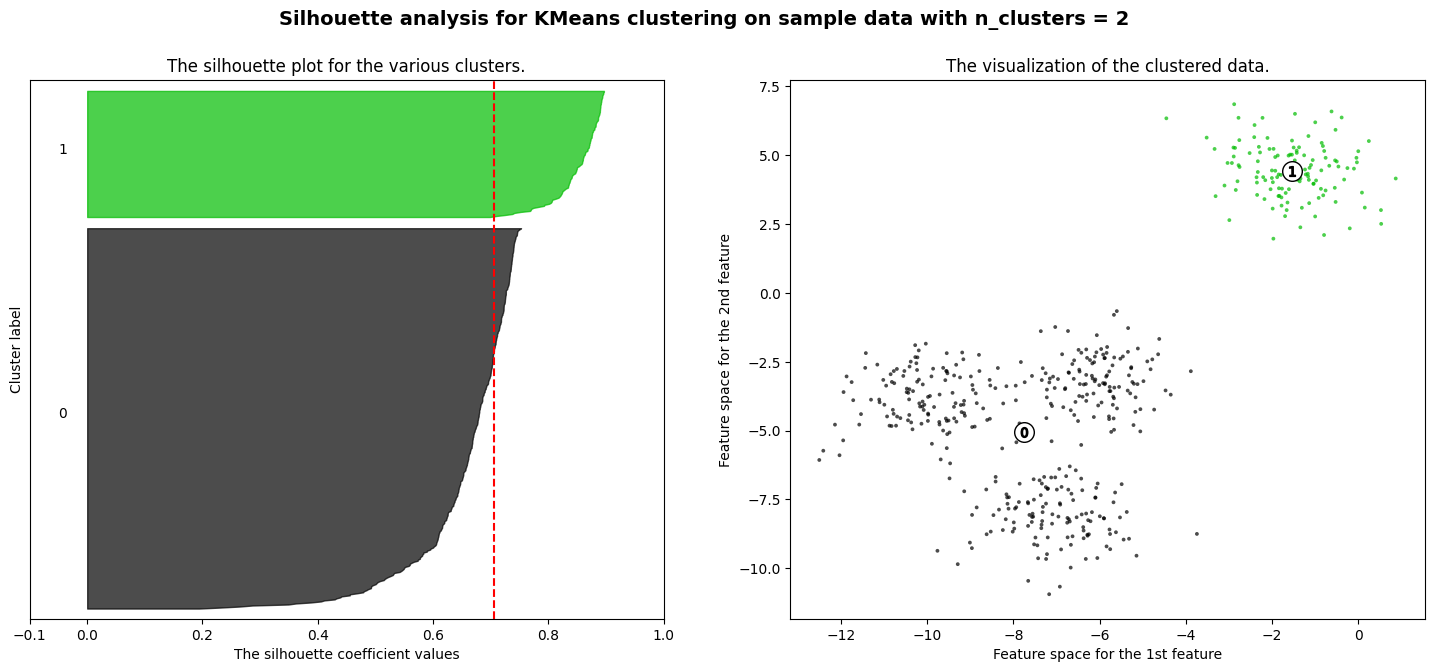

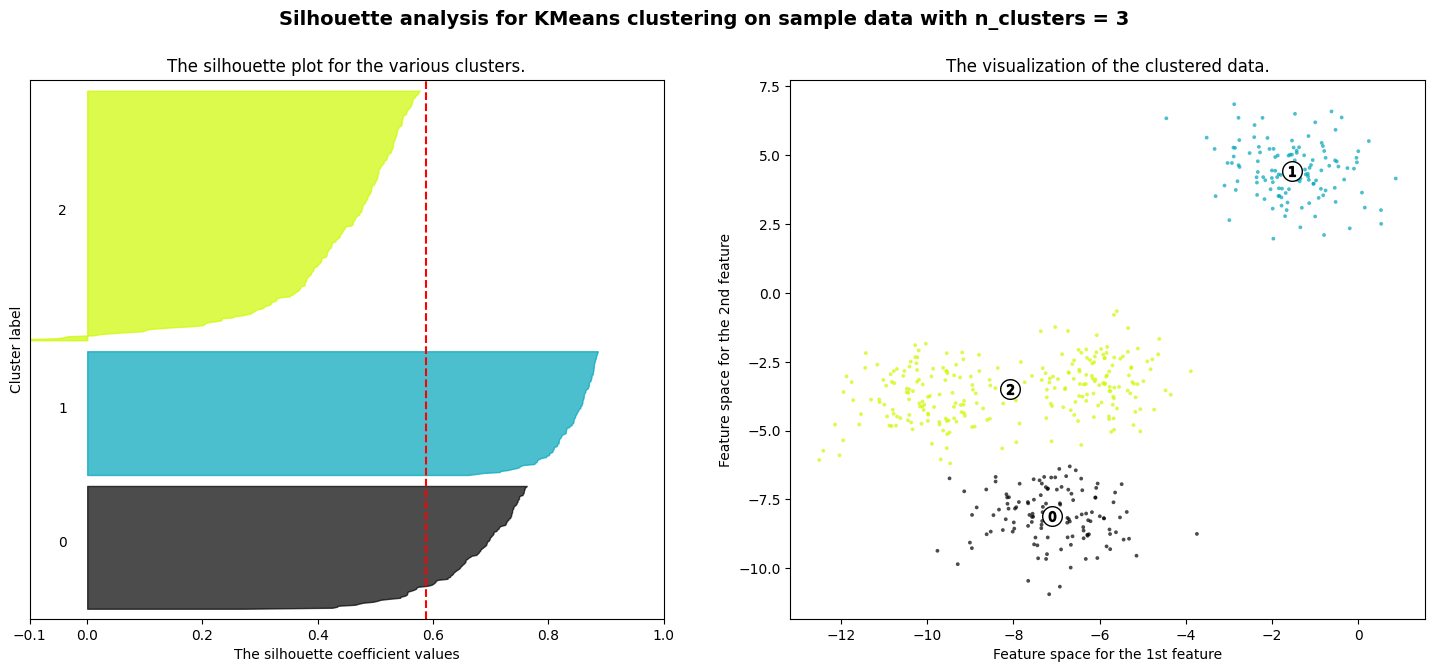

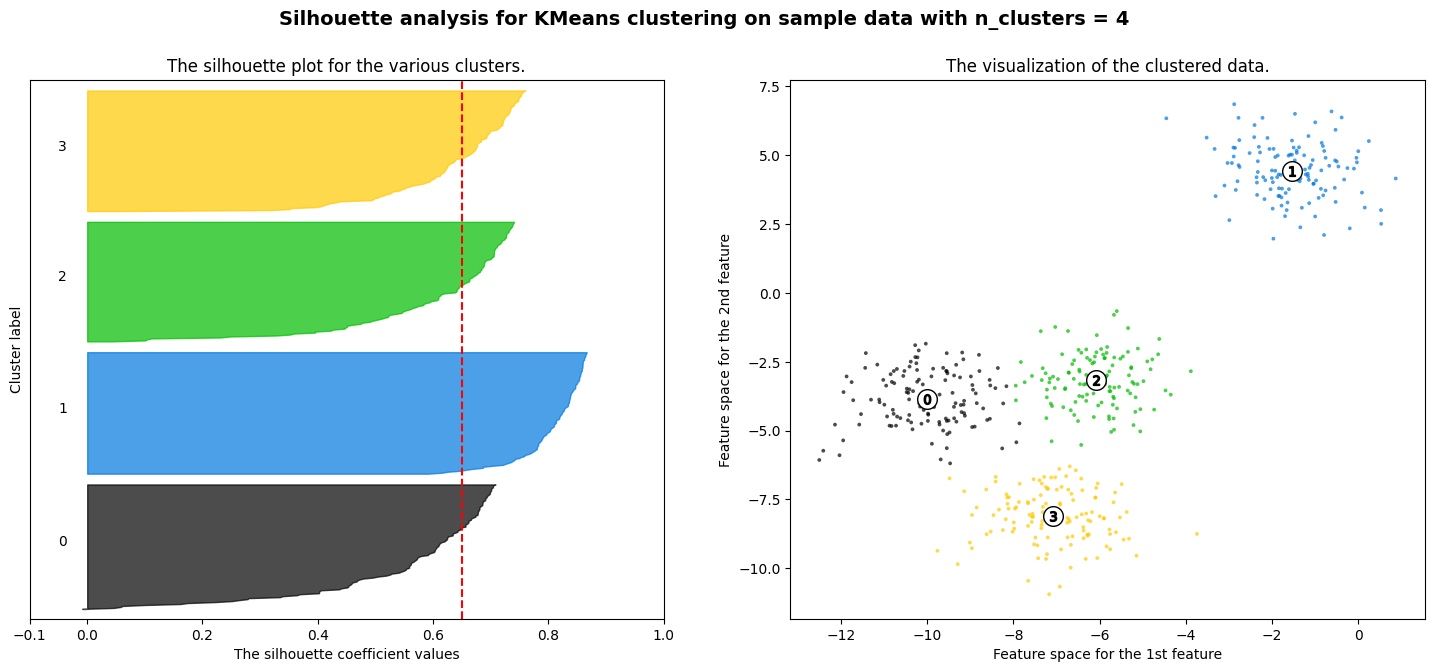

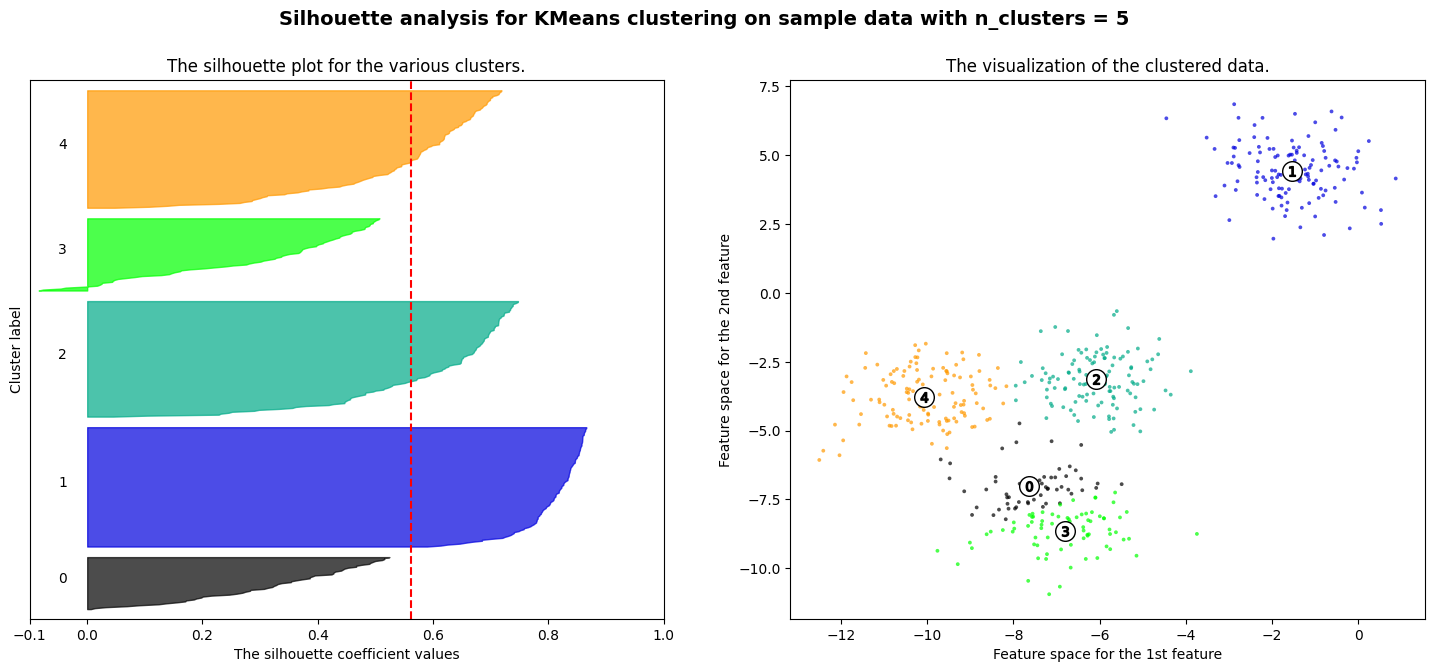

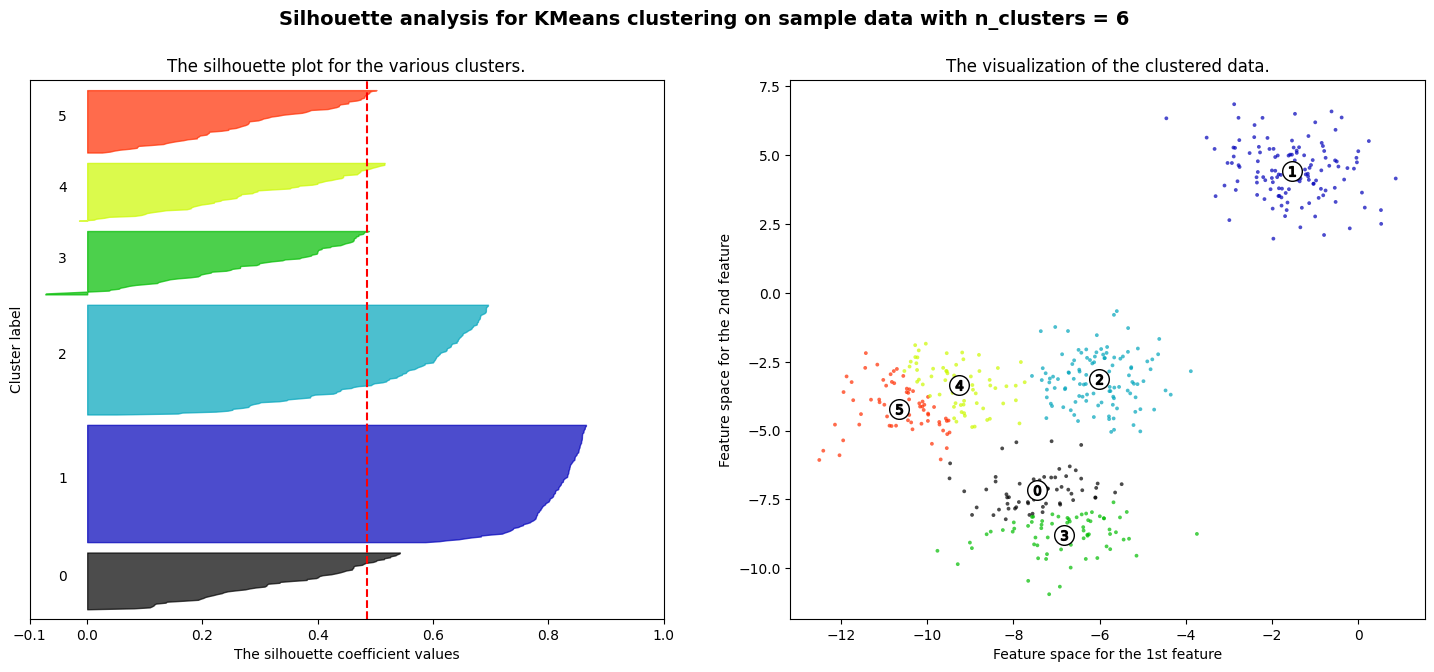

In [148]:
# Analiza skupień - część II

# === 1. Analiza profilu (Silhouette Analysis) ===
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Generowanie danych
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)

range_n_clusters = [2, 3, 4, 5, 6]
#To analiza klasteryzacji metodą KMeans z użyciem analizy silhouette dla różnych liczby klastrów (n_clusters = 2 do 6
for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()
#na wykresie czerwona linia przerywana to średnia wartość współczynnika silhouette dla wszystkich próbek.
# Wartość współczynnika silhouette dla każdego przykładu jest w przedziale [-1, 1].
# Wartości bliskie 1 oznaczają, że przykłady są dobrze przyporządkowane do swoich klastrów,
# wartości bliskie 0 oznaczają, że przykłady są na granicy między klastrami,


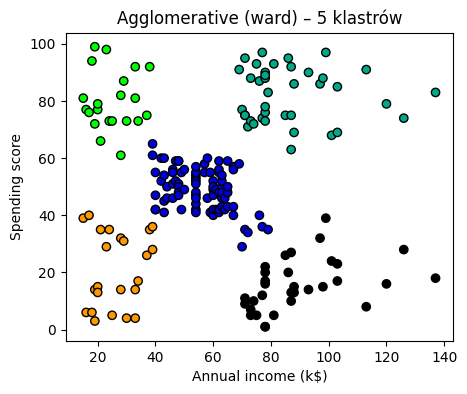

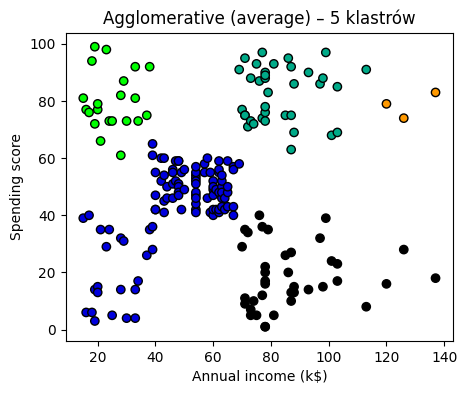

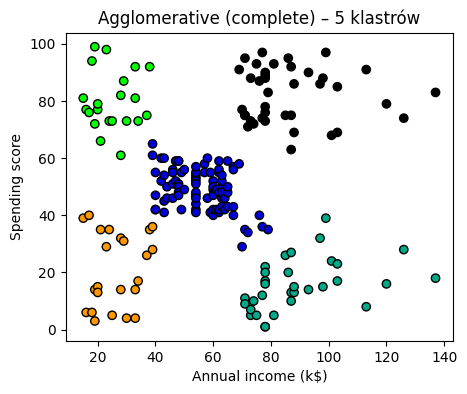

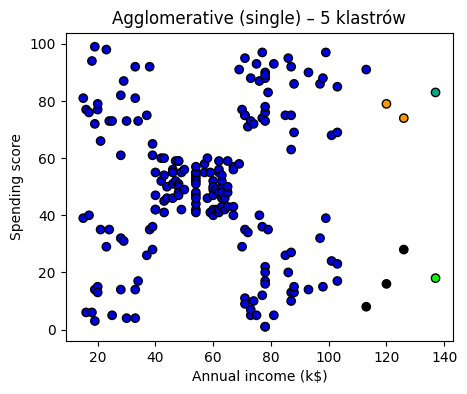

In [149]:
# ----------------------------- 2. HIERARCHICZNE KLASTRY -----------------------------
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import os

# wczytanie danych
path = 'C:/Users/kamil/Desktop/studia/6 sem/uczenie maszynowe/ucze_maszyny_pozdrawiam/lab10_klasteryzacja/shopping_data.csv'

customer_data = pd.read_csv(path)

# wybieramy cechy: Annual Income (k$) oraz Spending Score
data = customer_data.iloc[:, 3:5].values

# dostępne metody łączenia w scikit‑learn


#wczytywane są dane o klientach (m.in. dochód i wynik wydatków) i wykonywana jest klasteryzacja hierarchiczna z użyciem różnych metod łączenia (linkage):
#Ward – minimalizuje sumę kwadratów wewnątrzklastrowych.
#Average – średnia odległość między punktami z różnych klastrów.
#Complete – maksymalna odległość między punktami.
#Single – minimalna odległość między punktami (najbardziej podatna na "łańcuchowanie").

linkages = ["ward", "average", "complete", "single"]

for link in linkages:
    model = AgglomerativeClustering(n_clusters=5,
                                     metric='euclidean',
                                     linkage=link)
    labels = model.fit_predict(data)

    plt.figure(figsize=(5, 4))
    plt.title(f"Agglomerative ({link}) – 5 klastrów")
    colors = cm.nipy_spectral(labels.astype(float) / 5)
    plt.scatter(data[:, 0], data[:, 1], c=colors, edgecolor='k')
    plt.xlabel("Annual income (k$)")
    plt.ylabel("Spending score")
    plt.show()


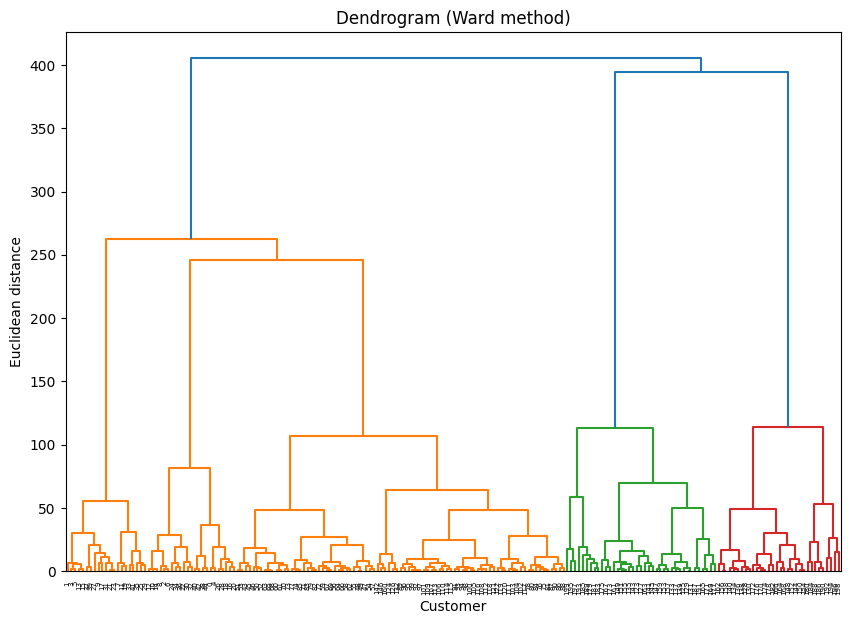

In [150]:
# === Dendrogram dla danych klientów (Annual Income vs Spending Score) ===
import scipy.cluster.hierarchy as ch

plt.figure(figsize=(10, 7))
plt.title("Dendrogram (Ward method)")
# obliczenie odległości metodą Warda
distance_matrix = ch.linkage(data, method='ward')
# wyświetlenie dendrogramu
ch.dendrogram(distance_matrix)
plt.xlabel("Customer")
plt.ylabel("Euclidean distance")
plt.show()


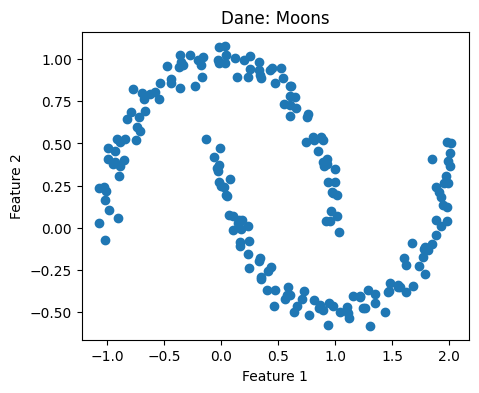

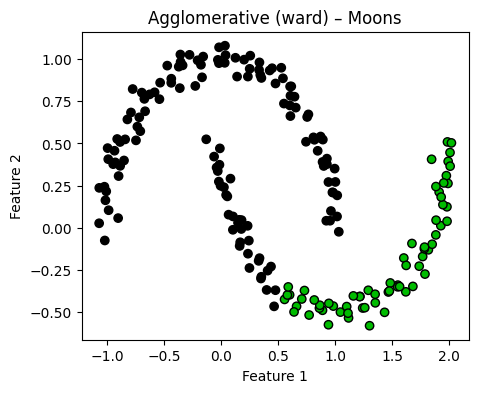

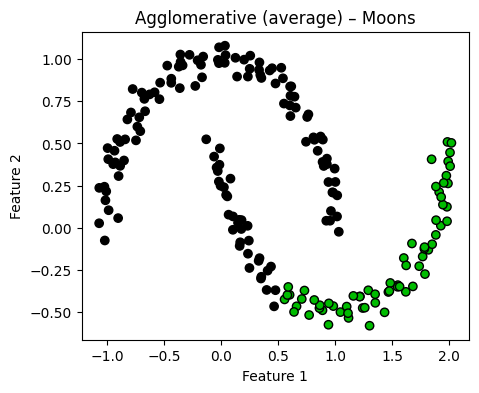

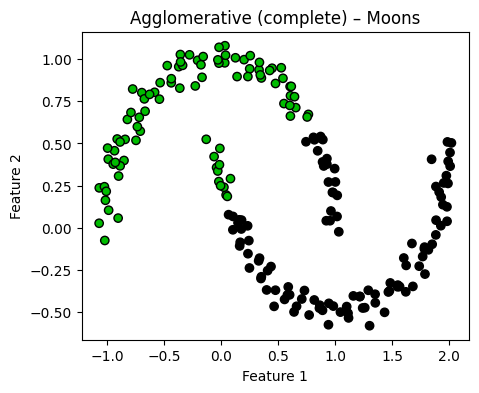

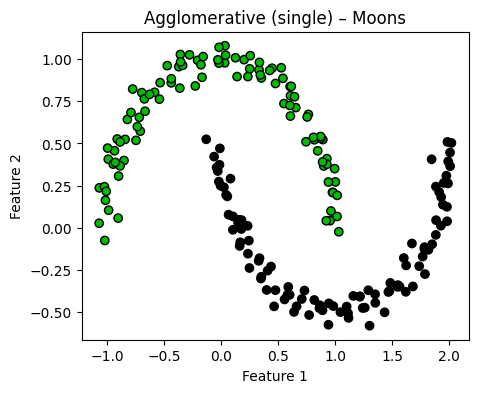

In [151]:
# === Klasteryzacja aglomeracyjna dla danych typu 'moons' ===
from sklearn.datasets import make_moons

x, y = make_moons(n_samples=200, noise=.05, random_state=0)

plt.figure(figsize=(5, 4))
plt.title("Dane: Moons")
plt.scatter(x[:, 0], x[:, 1])
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Zastosowanie różnych metod linkage
for link in linkages:
    model = AgglomerativeClustering(n_clusters=2, linkage=link)
    labels = model.fit_predict(x)

    plt.figure(figsize=(5, 4))
    plt.title(f"Agglomerative ({link}) – Moons")
    colors = cm.nipy_spectral(labels.astype(float) / 2)
    plt.scatter(x[:, 0], x[:, 1], c=colors, edgecolor='k')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()


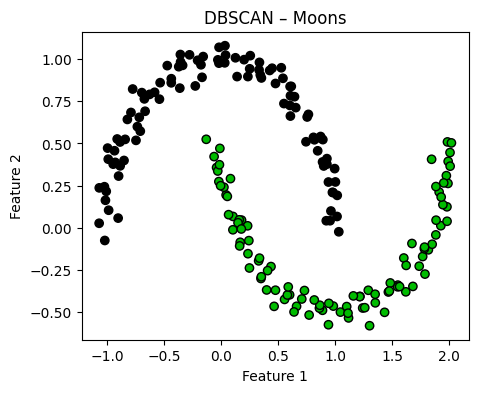

In [152]:
# === DBSCAN dla danych 'moons' ===
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(x)

plt.figure(figsize=(5, 4))
plt.title("DBSCAN – Moons")
# Dostosowanie koloryzacji
unique_labels = set(labels)
colors = cm.nipy_spectral(np.array(labels, dtype=float) / (len(unique_labels) - (1 if -1 in unique_labels else 0)))
plt.scatter(x[:, 0], x[:, 1], c=colors, edgecolor='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [ ]:
#algorytm DBSCAN jest bardziej odporny na szum i może wykrywać klastry o dowolnym kształcie,
# ale wymaga odpowiedniego dobrania parametrów eps (odległość sąsiedztwa) i min_samples (minimalna liczba punktów w klastrze).
#dzieje sie tak ponieważ algorytm DBSCAN identyfikuje punkty jako rdzenie, sąsiedztwa i szum,
# a następnie tworzy klastry na podstawie gęstości punktów, co pozwala na wykrywanie bardziej złożonych struktur niż KMeans.